In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import os
import zipfile
import xlrd

In [33]:
df = pd.read_csv(r'datasets/5_transaction_data.csv')


In [34]:
df.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


In [35]:
df.dtypes

date           object
name           object
transaction    object
dtype: object

In [37]:
df['date'] = pd.to_datetime(df['date'])

In [38]:
df.dtypes

date           datetime64[ns]
name                   object
transaction            object
dtype: object

In [40]:
df.isna().sum()

date           0
name           0
transaction    0
dtype: int64

In [41]:
df.describe()

,date
count,5315
mean,2020-03-02 00:43:56.628974592
min,2020-03-02 00:00:00
25%,2020-03-02 00:21:50.500000
50%,2020-03-02 00:43:26
75%,2020-03-02 01:06:22.500000
max,2020-03-02 01:29:05


In [42]:
df.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


In [49]:
df_transaction = df.groupby('transaction').date.count().reset_index()

In [52]:
df_transaction

,transaction,date
0,cancelled,1619
1,error,4
2,successfull,3692


In [118]:
df_transaction[df_transaction.transaction == 'error']

,transaction,date
1,error,4


[Text(0, 0, '1619'), Text(0, 0, '4'), Text(0, 0, '3692')]

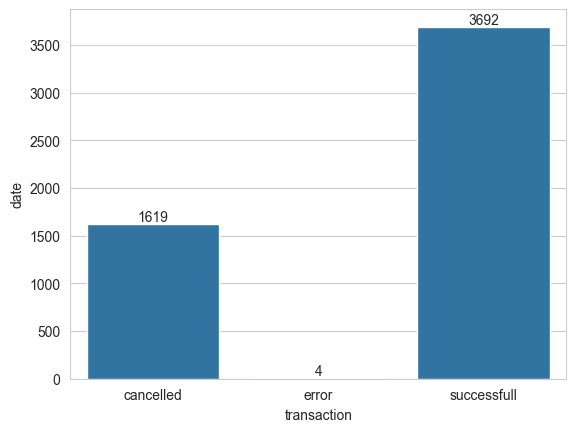

In [58]:
ax = sns.barplot(data=df_transaction, x='transaction', y='date')
ax.bar_label(ax.containers[0])

In [59]:
df.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


In [126]:
df_successfull_transaction = df[df.transaction == 'successfull'].groupby('name', as_index=False).transaction.count().reset_index().rename(columns={'transaction':'successfull_transaction'}).sort_values(by='successfull_transaction',ascending=False)

In [127]:
df_successfull_transaction

,index,name,successfull_transaction
48,48,Svetlana_Smirnova,82
31,31,Masha_Ozerova,80
41,41,Olga_Smirnova,80
43,43,Svetlana_Ivanova,79
33,33,Masha_Polyanova,78
47,47,Svetlana_Polyanova,78
6,6,Ekaterina_Smirnova,77
22,22,Lolita_Ivanova,76
10,10,Irina_Ozerova,76
9,9,Irina_Lesnova,76


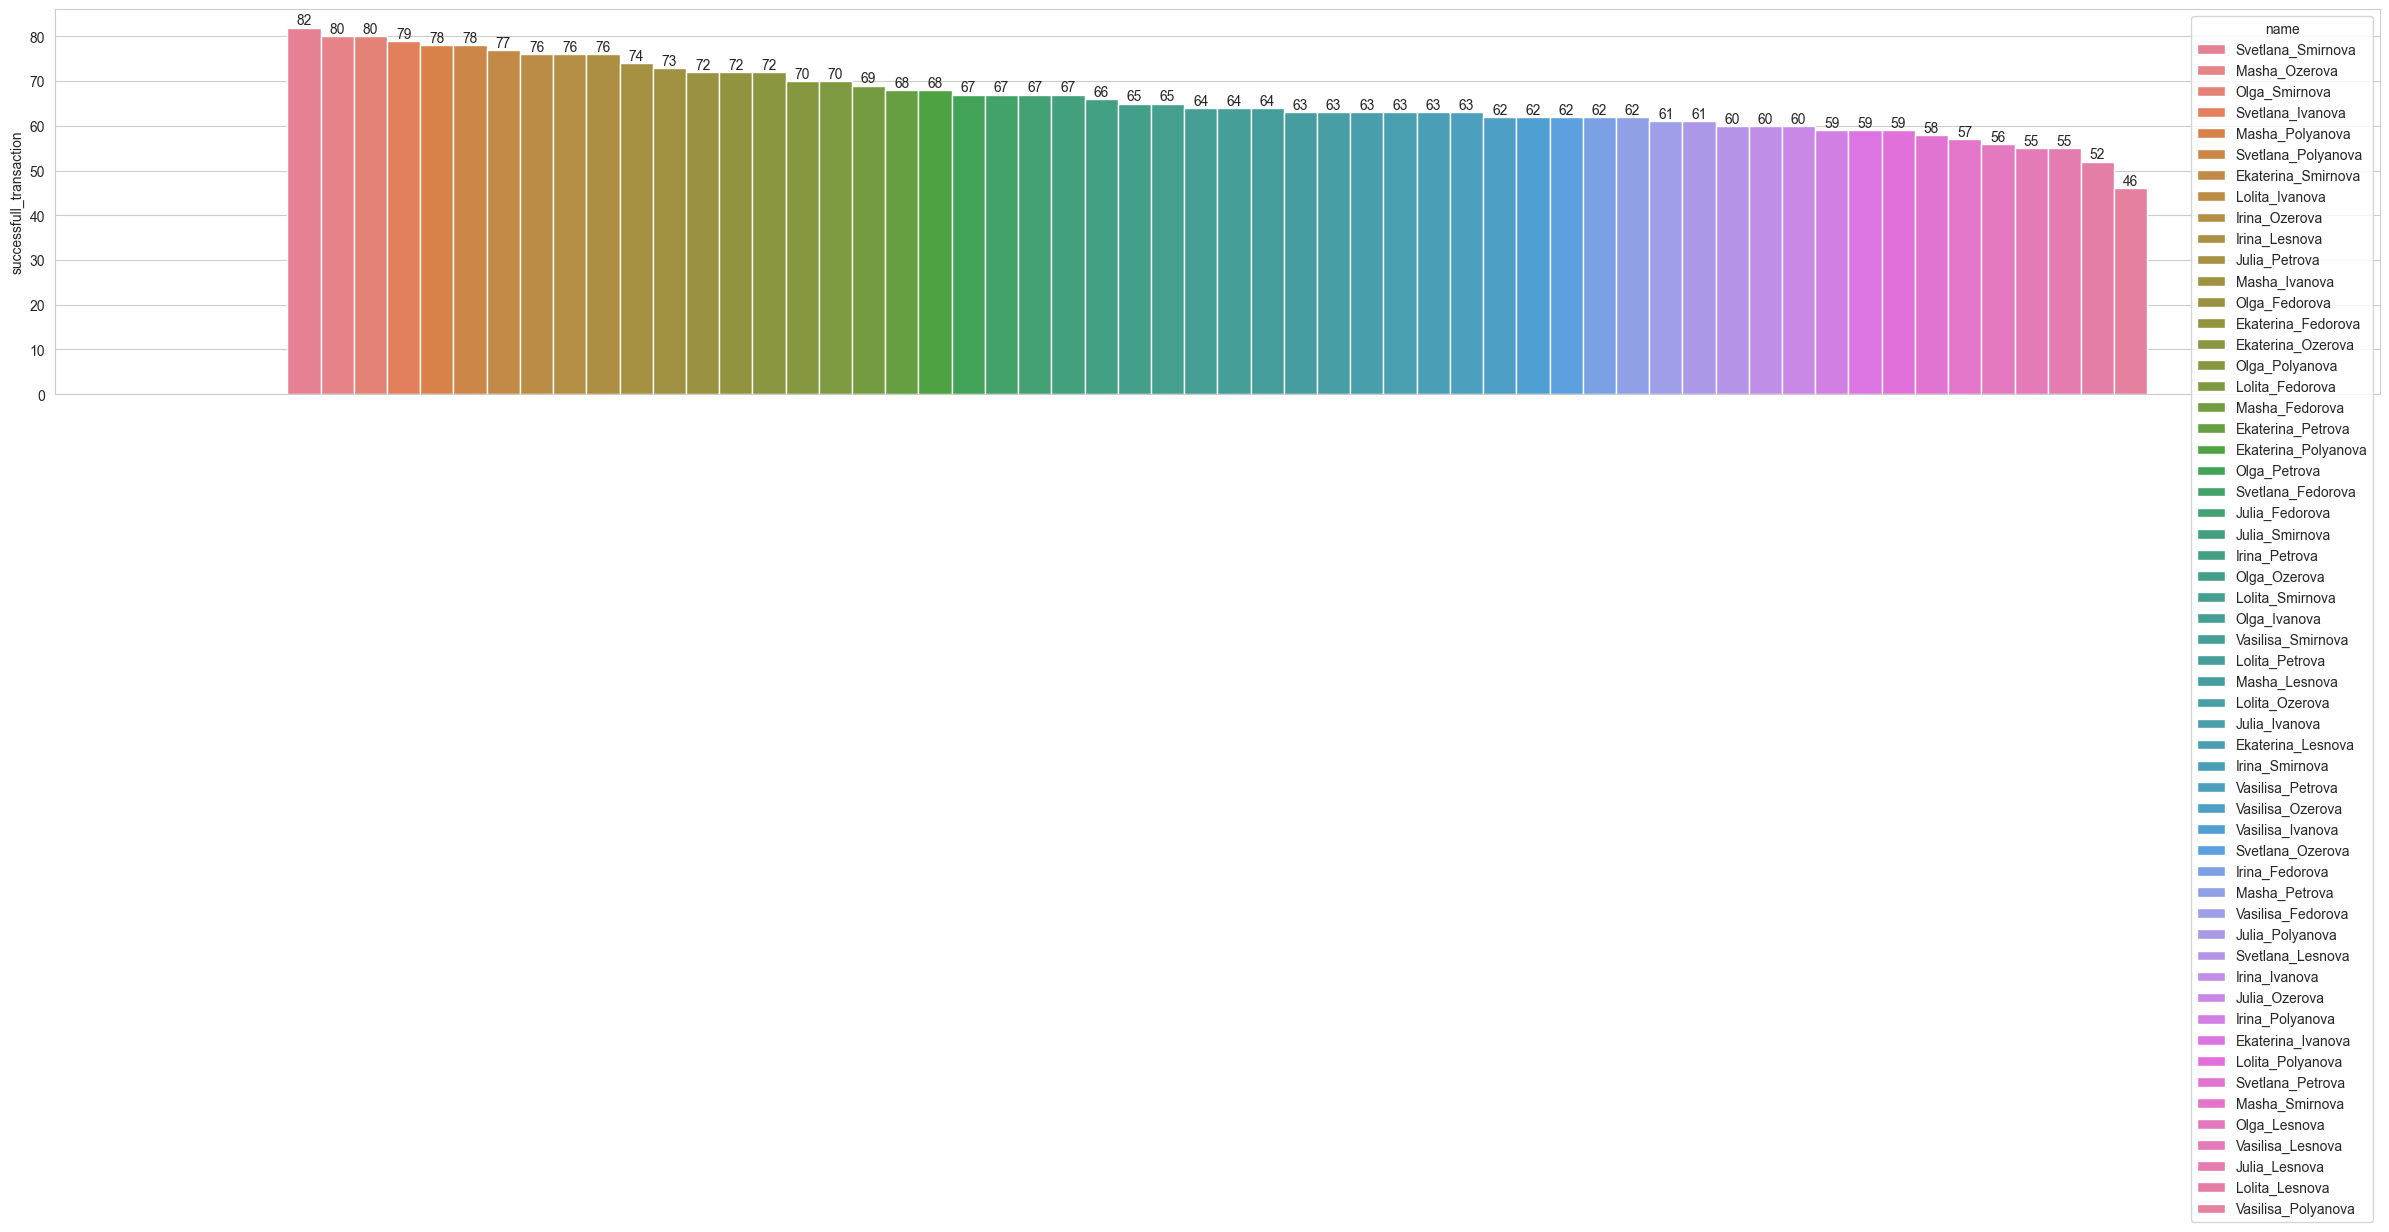

In [133]:
fig, ax = plt.subplots(figsize=(30, 5))
ax = sns.barplot(data=df_successfull_transaction, hue='name', y='successfull_transaction')
for container in ax.containers:
    ax.bar_label(container)

In [135]:
df_successfull_transaction.describe()

,index,successfull_transaction
count,56.000000,56.000000
mean,27.500000,65.928571
std,16.309506,7.787769
min,0.000000,46.000000
25%,13.750000,61.000000
50%,27.500000,64.000000
75%,41.250000,72.000000
max,55.000000,82.000000


In [84]:
df_update = pd.read_csv(r'datasets/5_transaction_data_updated.csv')

In [85]:
df_update.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [86]:
df_update.dtypes

date           object
name           object
transaction    object
minute          int64
dtype: object

In [90]:
df_update['date'] = pd.to_datetime(df_update['date'])

In [91]:
df_update.dtypes

date           datetime64[ns]
name                   object
transaction            object
minute                  int64
dtype: object

In [92]:
df_svod = df_update.merge(df)

In [93]:
df_svod.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [136]:
df_last = df_svod.groupby(['name', 'minute'], as_index=False).transaction.count().reset_index()

In [137]:
df_last

,index,name,minute,transaction
0,0,Ekaterina_Fedorova,0,3
1,1,Ekaterina_Fedorova,1,4
2,2,Ekaterina_Fedorova,2,1
3,3,Ekaterina_Fedorova,3,3
4,4,Ekaterina_Fedorova,4,3
...,...,...,...,...
2573,2573,Vasilisa_Smirnova,52,1
2574,2574,Vasilisa_Smirnova,53,1
2575,2575,Vasilisa_Smirnova,54,2
2576,2576,Vasilisa_Smirnova,56,3


In [139]:
df_plot = df_last.pivot(index='minute', columns='name', values='transaction').fillna(0).reset_index()

In [140]:
df_plot

name,minute,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
0,0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0
5,5,3.0,0.0,2.0,3.0,1.0,0.0,5.0,3.0,1.0,...,0.0,2.0,3.0,1.0,0.0,0.0,3.0,0.0,2.0,1.0
6,6,4.0,1.0,2.0,2.0,0.0,4.0,5.0,2.0,2.0,...,2.0,1.0,4.0,1.0,2.0,4.0,1.0,2.0,0.0,2.0
7,7,3.0,2.0,1.0,2.0,2.0,3.0,4.0,1.0,1.0,...,3.0,1.0,1.0,2.0,4.0,1.0,0.0,1.0,2.0,2.0
8,8,2.0,4.0,3.0,1.0,0.0,3.0,2.0,1.0,1.0,...,0.0,1.0,0.0,1.0,2.0,4.0,2.0,1.0,1.0,1.0
9,9,2.0,4.0,2.0,3.0,4.0,0.0,3.0,2.0,2.0,...,2.0,3.0,1.0,2.0,4.0,2.0,3.0,0.0,1.0,4.0


In [150]:
min_sum = df_plot.sum(axis=1)

In [151]:
min_sum

0     111.0
1     146.0
2     125.0
3     132.0
4      96.0
5     104.0
6     116.0
7     118.0
8     119.0
9     122.0
10    128.0
11    122.0
12    152.0
13    133.0
14    164.0
15    136.0
16    131.0
17    134.0
18    133.0
19    130.0
20    135.0
21    137.0
22    135.0
23    136.0
24    152.0
25    151.0
26    129.0
27    159.0
28    153.0
29     97.0
30     87.0
31     98.0
32    102.0
33     99.0
34     84.0
35     94.0
36     99.0
37    108.0
38     96.0
39     98.0
40     95.0
41     94.0
42    111.0
43    113.0
44     90.0
45    103.0
46    114.0
47     96.0
48    113.0
49     98.0
50    104.0
51    121.0
52    118.0
53    116.0
54    126.0
55    111.0
56    106.0
57    110.0
58    113.0
59    132.0
dtype: float64

<Axes: >

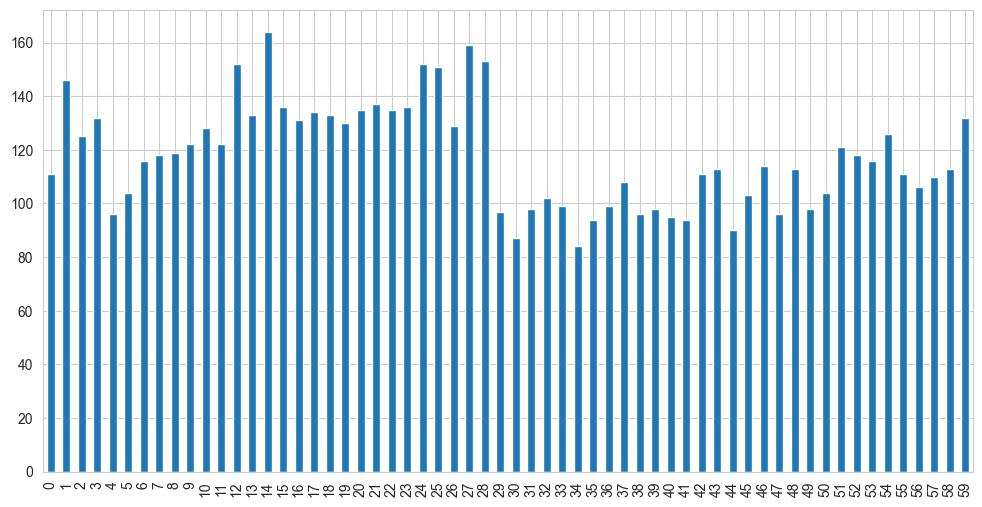

In [152]:
min_sum.plot.bar(figsize=(12,6))

In [153]:
df['true_minute'] = df.date.dt.minute + df.date.dt.hour *60

In [154]:
df.head()

,date,name,transaction,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


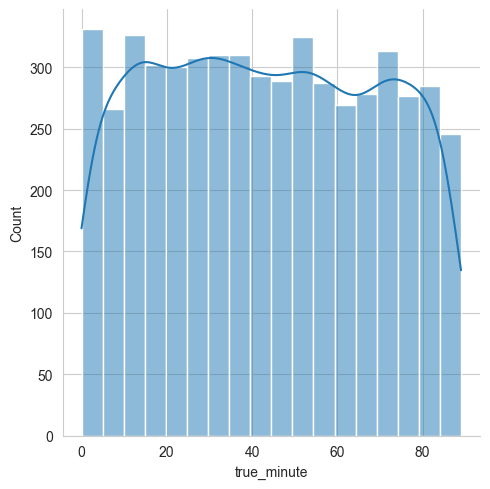

In [155]:
sns.displot(kde=True, x='true_minute', data=df)

ValueError: Could not interpret value `cancelled` for `y`. An entry with this name does not appear in `data`.

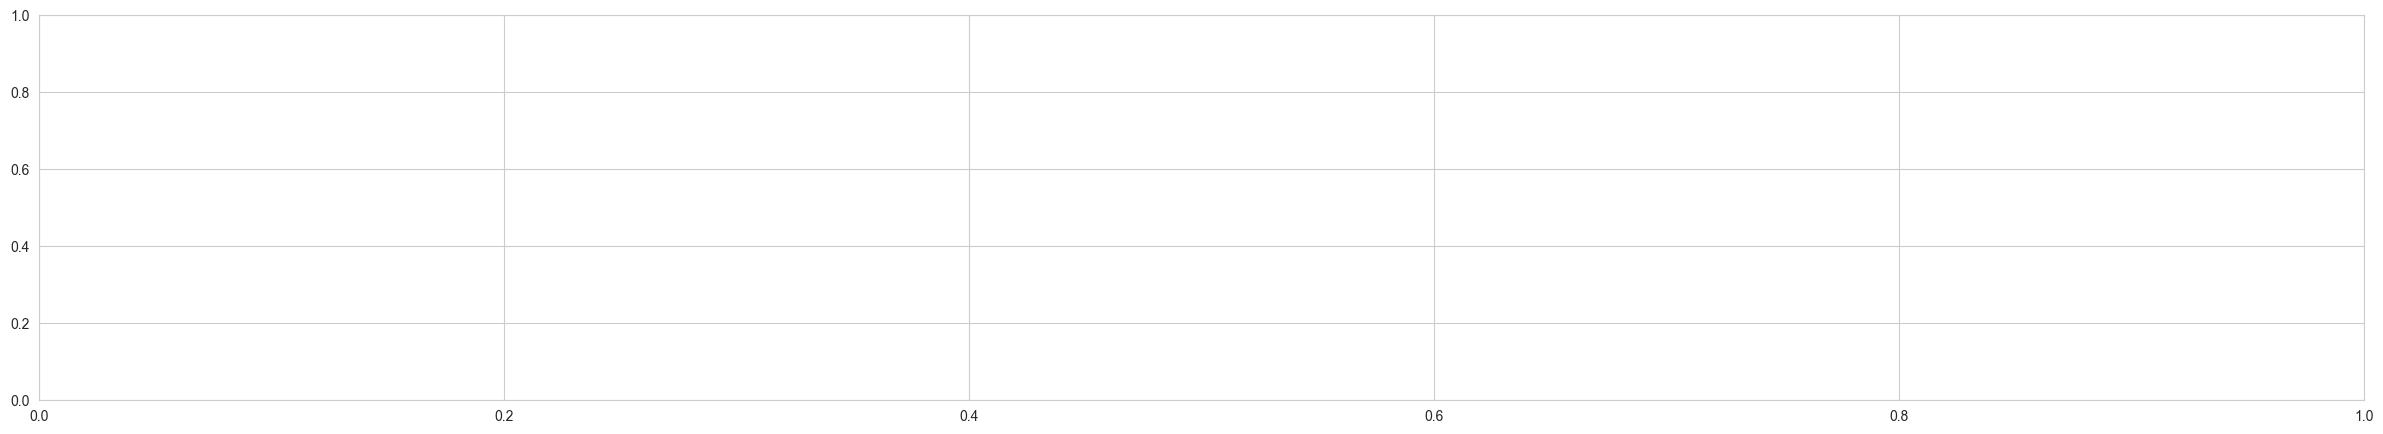

In [142]:
fig, ax = plt.subplots(figsize=(30, 5))
ax = sns.barplot(data=df_plot, hue='name', y='cancelled')
for container in ax.containers:
    ax.bar_label(container)

In [157]:
df_melted = df_plot.melt(id_vars='name', value_vars=['cancelled', 'error', 'successfull'],
                         var_name='transaction_type', value_name='count')

fig, ax = plt.subplots(figsize=(20, 5))
sns.barplot(data=df_melted, x='name', y='count', hue='transaction_type', ax=ax)
plt.xticks(rotation=90)
for container in ax.containers:
    ax.bar_label(container)

KeyError: "The following id_vars or value_vars are not present in the DataFrame: ['name', 'cancelled', 'error', 'successfull']"